In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import us
import requests
import datetime
from IPython.display import Image
from pyspark import SparkConf, SparkContext

conf = SparkConf().setAppName("Assignment4").setMaster("local")
sc = SparkContext.getOrCreate()

# Retrieving Data


In [199]:
response = requests.get("""https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2019-10-01&minmagnitude=4&limit=15000""")

if(response.status_code==200):
    file = open("./earthquakes.csv", "w+")
    file.write(response.text)
    file.close() 
else:
    print response.status_code

quakes = pd.read_csv('earthquakes.csv')
fixtime = pd.to_datetime(quakes['time'])

quakes['time'] = fixtime#.dt.year.month.day.time


# Question 1

In [200]:
quakeDesc = quakes.describe()
display(quakeDesc)

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,15000.000000,15000.000000,15000.000000,15000.000000,178.000000,14854.000000,14848.000000,15000.000000,14853.000000,15000.000000,14727.000000,14799.000000
mean,2.777532,35.043954,93.683822,4.554158,45.668539,108.510674,3.768917,0.806182,8.781464,4.836023,0.118253,41.293398
std,28.580163,124.008423,150.668364,0.398203,28.126374,49.210016,4.660418,0.257338,3.489150,3.968880,0.061137,58.967563
min,-65.607100,-179.998600,0.300000,4.000000,4.000000,9.000000,0.006619,0.060000,0.090000,0.000000,0.019000,0.000000
25%,-18.660800,-73.006275,10.000000,4.300000,23.000000,72.000000,1.318000,0.630000,6.400000,1.900000,0.073000,13.000000
50%,-1.908200,95.031900,27.415000,4.500000,40.000000,103.000000,2.505000,0.790000,8.300000,2.000000,0.110000,22.000000
75%,26.049975,139.807650,105.442500,4.700000,66.000000,140.000000,4.297250,0.970000,10.900000,7.500000,0.150000,43.000000
max,86.600900,179.997900,690.950000,8.000000,204.000000,334.000000,56.623000,1.640000,38.400000,44.940000,1.000000,854.000000


# Question 2

In [201]:
topMag = quakes.sort_values(by = 'mag', ascending=False).reset_index()
topMag.head(10)

,index,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,4549,2019-05-26 07:41:15.073000+00:00,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,...,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
1,4979,2019-05-14 12:58:25.939000+00:00,-4.0510,152.5967,10.00,7.6,mww,NaN,16.0,0.453,...,2019-09-05T17:58:06.523Z,"46km SSE of Namatanai, Papua New Guinea",earthquake,3.8,1.6,0.046,45.0,reviewed,us,us
2,7888,2019-02-22 10:17:23.770000+00:00,-2.1862,-77.0505,145.00,7.5,mww,NaN,15.0,2.045,...,2019-05-11T17:40:44.040Z,"111km ESE of Palora, Ecuador",earthquake,6.2,1.8,0.026,144.0,reviewed,us,us
3,14101,2018-09-28 10:02:45.250000+00:00,-0.2559,119.8462,20.00,7.5,mww,NaN,13.0,1.649,...,2019-10-01T11:05:19.616Z,"70km N of Palu, Indonesia",earthquake,5.8,1.8,0.050,39.0,reviewed,us,us
4,11186,2018-12-05 04:18:08.420000+00:00,-21.9496,169.4266,10.00,7.5,mww,NaN,18.0,2.405,...,2019-02-16T19:52:20.040Z,"165km ESE of Tadine, New Caledonia",earthquake,5.1,1.5,0.047,44.0,reviewed,us,us
5,3920,2019-06-15 22:55:04.130000+00:00,-30.6441,-178.0995,46.00,7.3,mww,NaN,11.0,1.402,...,2019-09-06T14:25:11.040Z,"116km NE of L'Esperance Rock, New Zealand",earthquake,9.1,1.8,0.029,113.0,reviewed,us,us
6,3512,2019-06-24 02:53:39.830000+00:00,-6.4078,129.1692,212.00,7.3,mww,NaN,16.0,2.629,...,2019-09-11T15:19:40.040Z,"292km NW of Saumlaki, Indonesia",earthquake,5.1,1.8,0.045,48.0,reviewed,us,us
7,10469,2018-12-20 17:01:55.150000+00:00,55.0999,164.6993,16.56,7.3,mww,NaN,23.0,4.126,...,2019-02-23T20:21:43.040Z,"83km W of Nikol'skoye, Russia",earthquake,7.9,2.9,0.025,155.0,reviewed,us,us
8,2532,2019-07-14 09:10:51.523000+00:00,-0.5858,128.0340,18.98,7.2,mww,NaN,38.0,1.504,...,2019-09-28T20:01:20.040Z,"93km NNE of Laiwui, Indonesia",earthquake,7.3,3.4,0.049,40.0,reviewed,us,us
9,5217,2019-05-06 21:19:37.983000+00:00,-6.9746,146.4494,146.00,7.1,mww,NaN,16.0,2.514,...,2019-07-25T18:54:27.040Z,"33km NW of Bulolo, Papua New Guinea",earthquake,6.6,1.6,0.032,93.0,reviewed,us,us


# Question 3

In [202]:
quakes.fillna(0,inplace=True)
quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-09-30 23:15:35.128000+00:00,16.7857,-99.0598,35.00,4.5,mwr,0.0,121.0,0.905,0.69,...,2019-10-02T11:01:06.768Z,"9km NE of Cruz Grande, Mexico",earthquake,8.6,2.0,0.098,10.0,reviewed,us,us
1,2019-09-30 21:47:13.104000+00:00,32.9215,-100.8600,5.00,4.0,mwr,0.0,30.0,0.068,0.99,...,2019-10-11T01:49:33.969Z,"23km NNE of Snyder, Texas",earthquake,3.4,2.0,0.037,71.0,reviewed,us,us
2,2019-09-30 21:31:33.745000+00:00,15.7538,-95.0044,21.54,4.3,mb,0.0,160.0,0.888,1.15,...,2019-10-11T01:45:00.040Z,"49km S of San Mateo del Mar, Mexico",earthquake,4.3,8.0,0.085,39.0,reviewed,us,us
3,2019-09-30 21:13:28.268000+00:00,-18.0400,-178.2666,630.29,4.0,mb,0.0,230.0,3.517,0.31,...,2019-10-11T01:41:29.040Z,"292km N of Ndoi Island, Fiji",earthquake,21.2,12.6,0.122,18.0,reviewed,us,us
4,2019-09-30 21:07:27.153000+00:00,-44.5610,167.7946,10.00,4.3,mb,0.0,63.0,0.837,1.01,...,2019-10-10T23:38:40.210Z,"86km NW of Queenstown, New Zealand",earthquake,2.6,1.8,0.154,12.0,reviewed,us,us


# Question 4

In [203]:
maxM = quakes.sort_values(by = 'mag', ascending=False).reset_index()

strong = pd.DataFrame(data=None,columns=["Magnitude","Place"])

strong["Magnitude"] = maxM["mag"]
strong["Place"] = maxM["place"]

strong.head(10)


,Magnitude,Place
0,8.0,"78km SE of Lagunas, Peru"
1,7.6,"46km SSE of Namatanai, Papua New Guinea"
2,7.5,"111km ESE of Palora, Ecuador"
3,7.5,"70km N of Palu, Indonesia"
4,7.5,"165km ESE of Tadine, New Caledonia"
5,7.3,"116km NE of L'Esperance Rock, New Zealand"
6,7.3,"292km NW of Saumlaki, Indonesia"
7,7.3,"83km W of Nikol'skoye, Russia"
8,7.2,"93km NNE of Laiwui, Indonesia"
9,7.1,"33km NW of Bulolo, Papua New Guinea"


# Question 5

In [204]:
minM = quakes.sort_values(by = 'mag', ascending=True).reset_index()

weak = pd.DataFrame(data=None,columns=["Magnitude","Place"])

weak["Magnitude"] = minM["mag"]
weak["Place"] = minM["place"]

weak.head(10)

,Magnitude,Place
0,4.0,North of Svalbard
1,4.0,"17km SE of Tarata, Peru"
2,4.0,"55km ESE of Waitara, New Zealand"
3,4.0,"70km SE of Taron, Papua New Guinea"
4,4.0,"14km E of Malunda, Indonesia"
5,4.0,"36km NE of Praiyawang, Indonesia"
6,4.0,"71km WNW of San Antonio de los Cobres, Argentina"
7,4.0,"64km E of Amatignak Island, Alaska"
8,4.0,South of the Fiji Islands
9,4.0,"37km NNE of `Alaqahdari-ye Kiran wa Munjan, Af..."


# Question 6
y = number
x = year
colors = groups

<Figure size 432x288 with 0 Axes>

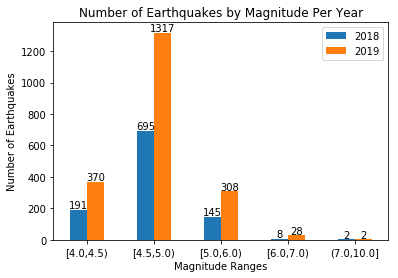

In [226]:
yearCounts = quakes.groupby(["time", "mag"], as_index=False).size().reset_index(name="Count")

# isolating the year in time column
onlyYear = yearCounts["time"].dt.year
yearCounts["time"] = onlyYear

data = [{"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0}]
    
# magnitude ranges 

grp1R = np.arange(4.0,4.5)
grp2R = np.arange(4.5,5.0)
grp3R = np.arange(5.0,6.0)
grp4R = np.arange(6.0,7.0)
grp5R = range(7,10)

# adding the count of earthquakes in 2018/2019 within each magnitude range
for index,row in yearCounts.iterrows():
    if row["mag"] in grp1R:
        if row["time"] == datetime.date(2019,1,1).year:
            data[0]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            data[0]['2018'] += row["Count"]
    if row["mag"] in grp2R:
        if row["time"] == datetime.date(2019,1,1).year:
            data[1]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            data[1]['2018'] += row["Count"]
    if row["mag"] in grp3R:
        if row["time"] == datetime.date(2019,1,1).year:
            data[2]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            data[2]['2018'] += row["Count"]
    if row["mag"] in grp4R:
        if row["time"] == datetime.date(2019,1,1).year:
            data[3]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            data[3]['2018'] += row["Count"]
    if row["mag"] in grp5R:
        if row["time"] == datetime.date(2019,1,1).year:
            data[4]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            data[4]['2018'] += row["Count"]

d = pd.DataFrame(data)

fig = plt.figure()
ax = pd.DataFrame(d).plot(kind='bar')

ax.set_xlabel("Magnitude Ranges")
ax.set_ylabel("Number of Earthquakes")
ax.set_xticklabels(("[4.0,4.5)","[4.5,5.0)","[5.0,6.0)","[6.0,7.0)","(7.0,10.0]"))
ax.xaxis.set_tick_params(rotation=0)
plt.title("Number of Earthquakes by Magnitude Per Year")

# placing value labels over each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+9,'%d'%int(height),ha='center')


plt.show()

# Question 7

In [206]:
places = quakes["place"].astype('str').reset_index(name="place")

df = []

states = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Minor Outlying Islands', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

for index,row in places.iterrows(): 
    # isolates the country in each row
    splitCountry = str(row["place"].replace(', ','..')).split('..')
    country = splitCountry[-1]

    # makes sure US states are not counted at counties 
    if(country in states):
        country = "United States"
        
    df.append({"Country": country})
    

cleaned = pd.DataFrame(df)
cleaned.style.hide_index()

countryCount = cleaned.groupby(["Country"], as_index=False).size().reset_index(name="Number of Earthquakes")

top10 = countryCount.sort_values(by='Number of Earthquakes', ascending=False).reset_index(drop=True)
    
display(top10.head(10))

,Country,Number of Earthquakes
0,Indonesia,2218
1,Japan,914
2,United States,809
3,Papua New Guinea,740
4,Philippines,722
5,Fiji,719
6,Russia,668
7,New Zealand,639
8,Chile,564
9,Tonga,465


# Question 8

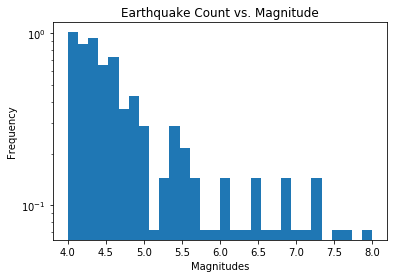

Relationship: the magnitude of most earthqaukes are within [4.0,5.5] and stronger earthquakes are more rare


In [207]:
m = quakes.groupby(["mag"], as_index=False).size().reset_index(name="Count")
fig, ax = plt.subplots()

ax.hist(m["mag"], bins=30,density=True)


ax.set_ylabel("Frequency")
ax.set_xlabel("Magnitudes")
plt.title("Earthquake Count vs. Magnitude")
plt.yscale('log')

plt.show()

print("Relationship: the magnitude of most earthqaukes are within [4.0,5.5] and stronger earthquakes are more rare")

# Question 9

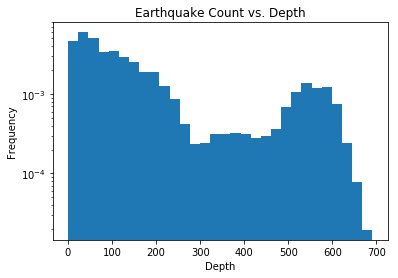

Relationship: the depths of most earthqaukes are usually lower than 350, but larger depths are also common


In [208]:
m = quakes.groupby(["depth"], as_index=False).size().reset_index(name="Count")
fig, ax = plt.subplots()
#ax.hist(m["depth"], bins=10 ** np.logspace(np.log10(0.1),np.log10(1.0),120),cumulative=True,density=True)
ax.hist(m["depth"], bins=30,density=True)

ax.set_ylabel("Frequency")
ax.set_xlabel("Depth")
plt.title("Earthquake Count vs. Depth")
plt.yscale('log')

plt.show()
print("Relationship: the depths of most earthqaukes are usually lower than 350, but larger depths are also common")

# Question 10

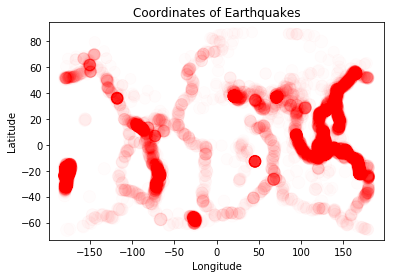

In [209]:
sct = quakes.groupby(["latitude","longitude","mag"], as_index=False).size().reset_index(name="Count")

y = sct["latitude"]
x = sct["longitude"]
n = sct["mag"]

rng = np.random.RandomState(0)
colors = rng.rand(len(n))

fig,ax = plt.subplots()

ax.scatter(x,y, s=n*30, c="r", alpha=0.01)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("Coordinates of Earthquakes")

plt.show()

# Question 11

In [210]:
places = quakes

places["place"] = places["place"].astype('str')

tempState = us.states.STATES_AND_TERRITORIES
states = [str(i) for i in tempState]

df = pd.DataFrame(data=None, columns=places.columns, index=places.index)
d = []

# function to add only the country/state of place column into a dataframe
for index,row in places.iterrows():
    splitCountry = str(row["place"].replace(', ','..')).split('..')
    country = splitCountry[-1]
    d.append({"place":country})

swapPlace = pd.DataFrame(d)

# replace old place column with new column with only country/state
places["place"] = swapPlace["place"]

# finds all rows that have a US state/territory in the place column and saves it as a dataframe
cleanedUSData = places[places["place"].str.contains('|'.join(states))]

cleanedUSData.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1,2019-09-30 21:47:13.104000+00:00,32.9215,-100.8600,5.00,4.0,mwr,0.0,30.0,0.068,0.99,...,2019-10-11T01:49:33.969Z,Texas,earthquake,3.4,2.0,0.037,71.0,reviewed,us,us
33,2019-09-30 02:54:17.822000+00:00,-57.3514,-26.1035,92.79,4.5,mb,0.0,107.0,6.609,0.98,...,2019-10-10T05:10:10.040Z,South Georgia and the South Sandwich Islands,earthquake,11.4,5.7,0.111,24.0,reviewed,us,us
50,2019-09-29 16:45:00.152000+00:00,56.3526,-148.9095,21.10,4.0,ml,0.0,259.0,2.466,0.36,...,2019-10-08T17:03:32.040Z,Alaska,earthquake,10.3,11.9,0.042,74.0,reviewed,us,us
68,2019-09-29 03:48:18.448000+00:00,22.2441,144.4541,62.12,4.8,mb,0.0,101.0,7.079,0.78,...,2019-09-29T04:06:39.040Z,Northern Mariana Islands,earthquake,10.9,7.6,0.053,111.0,reviewed,us,us
81,2019-09-28 17:09:36.006000+00:00,13.9964,145.1204,107.05,4.5,mb,0.0,119.0,0.473,0.66,...,2019-10-01T14:12:16.530Z,Northern Mariana Islands,earthquake,9.4,6.7,0.104,31.0,reviewed,us,us


# Question 12

### A

In [211]:
maxUS = cleanedUSData.sort_values(by = 'mag', ascending=False).reset_index()
strongUS = pd.DataFrame(data=None,columns=["Magnitude","Place"])

strongUS["Magnitude"] = maxUS["mag"]
strongUS["Place"] = maxUS["place"]

strongUS.head(10)

,Magnitude,Place
0,7.1,Alaska
1,6.4,South Georgia and the South Sandwich Islands
2,6.4,Alaska
3,6.4,South Georgia and the South Sandwich Islands
4,6.4,Northern Mariana Islands
5,6.3,Oregon
6,6.0,Puerto Rico
7,6.0,Northern Mariana Islands
8,6.0,South Georgia and the South Sandwich Islands
9,6.0,Alaska


### B

<Figure size 432x288 with 0 Axes>

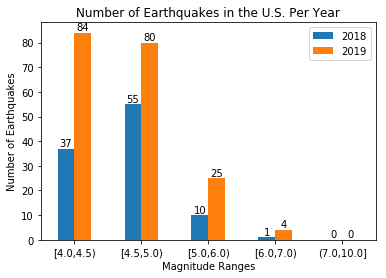

In [220]:
us_yearCounts = cleanedUSData.groupby(["time", "mag"], as_index=False).size().reset_index(name="Count")

onlyYear_us = us_yearCounts["time"].dt.year
us_yearCounts["time"] = onlyYear_us


bardata_us = [{"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0},
        {"2018": 0,"2019": 0}]
    
# magnitude ranges 

grp1R_us = np.arange(4.0,4.5)
grp2R_us = np.arange(4.5,5.0)
grp3R_us = np.arange(5.0,6.0)
grp4R_us = np.arange(6.0,7.0)
grp5R_us = range(7,10)

# adding the count of earthquakes in 2018/2019 within each magnitude range
for index,row in us_yearCounts.iterrows():
    if row["mag"] in grp1R_us:
        if row["time"] == datetime.date(2019,1,1).year:
            bardata_us[0]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            bardata_us[0]['2018'] += row["Count"]
    if row["mag"] in grp2R_us:
        if row["time"] == datetime.date(2019,1,1).year:
            bardata_us[1]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            bardata_us[1]['2018'] += row["Count"]
    if row["mag"] in grp3R_us:
        if row["time"] == datetime.date(2019,1,1).year:
            bardata_us[2]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            bardata_us[2]['2018'] += row["Count"]
    if row["mag"] in grp4R_us:
        if row["time"] == datetime.date(2019,1,1).year:
            bardata_us[3]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            bardata_us[3]['2018'] += row["Count"]
    if row["mag"] in grp5R_us:
        if row["time"] == datetime.date(2019,1,1).year:
            bardata_us[4]['2019'] += row["Count"]
        if row["time"] == datetime.date(2018,1,1).year:
            bardata_us[4]['2018'] += row["Count"]

d = pd.DataFrame(bardata_us)

fig = plt.figure()
ax = pd.DataFrame(d).plot(kind='bar')

ax.set_xlabel("Magnitude Ranges")
ax.set_ylabel("Number of Earthquakes")
ax.set_xticklabels(("[4.0,4.5)","[4.5,5.0)","[5.0,6.0)","[6.0,7.0)","(7.0,10.0]"))
ax.xaxis.set_tick_params(rotation=0)
plt.title("Number of Earthquakes in the U.S. Per Year")

rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+1,'%d'%int(height),ha='center')

plt.show()

### C

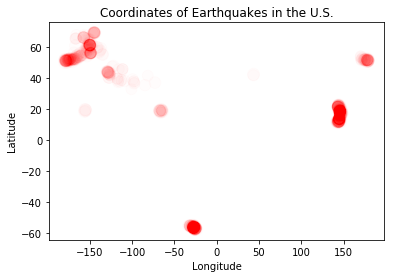

In [213]:
sct_us = cleanedUSData.groupby(["latitude","longitude","mag"], as_index=False).size().reset_index(name="Count")

y = sct_us["latitude"]
x = sct_us["longitude"]
n = sct_us["mag"]


fig,ax = plt.subplots()

ax.scatter(x,y, s=n*30, c="r", alpha=0.01)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("Coordinates of Earthquakes in the U.S.")

plt.show()